In [415]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [416]:
df = pd.read_csv(r"C:\Data Anaylsis\E-COMMERCE -SALES-ANYALSIS\ecommerce.csv")


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36915 entries, 0 to 36914
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            36915 non-null  object 
 1   customer_id         36915 non-null  object 
 2   product_id          36915 non-null  object 
 3   category            36915 non-null  object 
 4   price               36915 non-null  float64
 5   discount            36915 non-null  float64
 6   quantity            36915 non-null  int64  
 7   payment_method      36915 non-null  object 
 8   order_date          36915 non-null  object 
 9   delivery_time_days  36915 non-null  int64  
 10  region              36915 non-null  object 
 11  returned            32500 non-null  object 
 12  total_amount        36915 non-null  float64
 13  shipping_cost       36915 non-null  float64
 14  profit_margin       36915 non-null  float64
 15  customer_age        36915 non-null  int64  
 16  cust

In [418]:
df.describe()


,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.00000,36915.000000
mean,93.843804,0.043436,8.102127,4.821157,169.365458,6.145777,24.63966,40.184722
std,192.085162,0.067671,81.250118,1.227355,355.972888,2.388611,50.92846,28.924417
min,-1942.940000,0.000000,-3.000000,3.000000,0.820000,0.000000,-6.20000,0.000000
25%,7.210000,0.000000,1.000000,4.000000,19.640000,4.420000,0.00000,25.000000
50%,30.930000,0.000000,1.000000,5.000000,56.630000,6.080000,7.24000,40.000000
75%,104.695000,0.050000,2.000000,6.000000,167.575000,7.820000,27.93000,55.000000
max,2930.470000,0.300000,1000.000000,13.000000,12931.800000,15.650000,1536.17000,250.000000


In [419]:
df.shape

(36915, 17)

In [420]:
print(list((df.columns)))

['order_id', 'customer_id', 'product_id', 'category', 'price', 'discount', 'quantity', 'payment_method', 'order_date', 'delivery_time_days', 'region', 'returned', 'total_amount', 'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender']


In [421]:
print(df['order_date'].dtypes)

object


In [422]:
df1= df.copy()

In [423]:
for i in df1['order_date']:
    print(i)

23 Dec 2023
04/03/2025
2024-10-08
2024-09-14
21 Dec 2024
14-04-24
20-05-25
14/09/2023
23-10-23
31 Oct 2023
07 Feb 2024
2024-07-08
13/10/2024
01 Nov 2023
not available
2024-05-03
not available
12/09/2024
2025-06-20
2024-10-10
2024-05-10
not available
2024-12-14
not available
16-04-24
31-08-24
26 Aug 2025
19 Aug 2025
05/27/2024
2023-10-11
12 Nov 2023
04/08/2024
30/12/2023
not available
2024-08-08
04/04/2024
05/27/2025
07/10/2024
2025-02-13
17/08/2024
09 Dec 2023
31/03/2024
03 Feb 2025
2023-10-31
09/27/2024
04/11/2025
not available
03 May 2025
19/03/2025
12/03/2025
14-07-25
2024-12-31
16/09/2024
24 Jan 2024
29 Dec 2023
not available
18-12-23
2023-12-06
30-10-24
16 Aug 2024
01 Dec 2024
13 Nov 2023
26/06/2024
not available
22/01/2024
2025-06-23
03/09/2025
14-02-24
2023-12-15
22/11/2023
30 May 2024
not available
21/09/2024
24/02/2025
06 Dec 2024
12/21/2023
13 Feb 2025
05/14/2024
20-12-23
28/06/2024
13 Mar 2024
23 Jan 2025
not available
23 Sep 2023
06/08/2024
04-08-25
06/12/2024
06/18/2024
12

In [424]:
import re
from datetime import datetime

# Sample DataFrame
data = df1['order_date']
df2 = pd.DataFrame(data)

# Function to parse dates
def parse_order_date(date_str):
    # Case 1: dd/mm/yyyy or mm/dd/yyyy
    if re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', date_str):
        first = int(date_str.split('/')[0])
        # If first > 12 → assume day/mm/yyyy
        if first > 12:
            return datetime.strptime(date_str, '%d/%m/%Y').date()
        else:  # else assume mm/dd/yyyy
            return datetime.strptime(date_str, '%m/%d/%Y').date()
    
    # Case 2: 23 Dec 2024
    elif re.match(r'^\d{1,2} [A-Za-z]{3} \d{2,4}$', date_str):
        return datetime.strptime(date_str, '%d %b %Y').date()
    
    # Case 3: 23-12-24
    elif re.match(r'^\d{2}-\d{2}-\d{2}$', date_str):
        return datetime.strptime(date_str, '%d-%m-%y').date()
    
    # Already proper date or unknown format
    else:
        try:
            return pd.to_datetime(date_str).date()  # fallback
        except:
            return pd.NaT  # if cannot parse

# Apply the function
df1['order_date'] = df1['order_date'].apply(parse_order_date)

# print(df)


In [425]:
df1.head(100)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,0.00,0.15,1,Credit Card,2023-12-23,4,West,NaN,139.47,7.88,0.00,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Other,2024-10-08,4,Other,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,NaN,63.67,5.50,2.14,0,Female
4,O100004,C15226,P228063,Home,-16.33,0.15,1,Cash,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,O100095,C12613,P200840,Fashion,22.26,0.00,1,Wallet,NaT,7,East,No,22.26,3.96,3.83,27,Male
96,O100096,C15225,P234229,Fashion,5.15,0.05,1,Credit Card,NaT,5,East,NaN,4.89,3.77,-2.06,36,Male
97,O100097,C13843,P221318,Fashion,37.42,0.00,5,Cash,2024-09-26,3,Central,No,168.39,8.25,0.00,29,Male
98,O100098,C17989,P215405,Beauty,115.85,0.15,1,Debit Card,2025-05-02,5,West,No,98.47,6.58,37.73,40,Female


In [426]:
df1[df1['price'] <= 0]

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,0.00,0.15,1,Credit Card,2023-12-23,4,West,NaN,139.47,7.88,0.00,60,Female
4,O100004,C15226,P228063,Home,-16.33,0.15,1,Cash,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
11,O100011,C15334,P212540,Beauty,0.00,0.00,1,Wallet,2024-07-08,5,Other,No,16.22,3.72,0.00,21,Other
18,O100018,C17831,P218405,Electronics,0.00,0.00,2,Wallet,2025-06-20,4,South,No,1468.64,10.90,165.34,58,Female
20,O100020,C11685,P246233,Toys,0.00,0.00,2,Other,2024-05-10,4,West,No,35.98,5.56,8.83,64,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36886,O112528,C16755,P209702,Sports,-200.40,0.05,4,Wallet,NaT,9,South,NaN,761.52,11.29,217.17,50,Female
36887,O114471,C10565,P218694,Fashion,-127.75,0.05,1,UPI,2024-01-01,7,East,No,121.36,6.98,35.50,52,Male
36896,O126556,C12688,P238733,Home,0.00,0.15,1,Credit Card,2025-04-17,4,South,No,18.97,4.26,1.05,0,Male
36902,O129111,C12364,P232605,Toys,0.00,0.00,1,Debit Card,2024-08-07,5,Central,No,7.41,5.13,-2.17,0,Male


In [427]:
print((df1['total_amount'] < 0 ).sum())


0


In [428]:
print((df1['price'] < 0).sum())

1636


In [429]:
df1['price'] = df1['price'].apply(lambda x: abs(x) if x<=0 else x )

In [430]:
print((df1['price'] < 0).sum())

0


In [431]:
print((df1['quantity'] < 0).sum())

265


In [432]:
df[df1['quantity'] <= 0]

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
73,O100073,C17513,P231818,Sports,217.48,0.00,-3,Card,24/02/2025,6,South,No,217.48,7.67,57.57,24,Male
123,O100123,C11076,P210507,Grocery,11.77,0.20,0,Cash,not available,7,East,No,9.42,1.00,-0.25,0,Female
128,O100128,C16331,P223570,Sports,-56.72,0.00,0,Cash,2024-02-26,6,East,No,113.44,8.53,25.50,38,Male
315,O100315,C10197,P214954,Fashion,19.36,0.00,0,UPI,09 Aug 2025,4,Central,No,58.08,5.64,14.69,18,Male
482,O100482,C10699,P220828,Beauty,4.15,0.00,0,Wallet,26-01-25,4,South,No,4.15,4.33,-2.46,35,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36581,O134214,C12288,P249834,Toys,9.18,0.05,0,Credit Card,28/02/2024,6,Other,No,8.72,4.08,-0.59,25,Female
36675,O120888,C16971,P202283,Beauty,37.27,0.00,0,UPI,20-08-24,5,East,No,37.27,5.12,11.65,0,Female
36824,O115573,C17130,P204965,Grocery,0.00,0.00,-3,Debit Card,15-10-24,6,East,No,23.15,6.28,-4.43,0,Female
36891,O129724,C12090,P200310,Toys,83.50,0.15,-3,UPI,21/04/2024,5,North,No,70.97,6.91,21.48,55,Female


In [433]:
df1['quantity'] = df1['quantity'].apply(lambda x: abs(x) if x<=0 else x )

In [434]:
df1['quantity'] = df1['quantity'].apply(lambda x: 1 if x<=0 else x )

In [435]:
def fill(row):
    if row['price'] == 0:
        return row['total_amount'] / (row['quantity'] * (1 - row['discount']))
    else:
        return row['price']

df1['price'] = df1.apply(fill, axis=1)


In [436]:
df1.head(50)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.082353,0.15,1,Credit Card,2023-12-23,4,West,NaN,139.47,7.88,0.00,60,Female
1,O100001,C17603,P228204,Grocery,24.730000,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.580000,0.05,1,Other,2024-10-08,4,Other,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.670000,0.00,1,UPI,2024-09-14,6,South,NaN,63.67,5.50,2.14,0,Female
4,O100004,C15226,P228063,Home,16.330000,0.15,1,Cash,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
5,O100005,C15191,P214062,Beauty,53.910000,0.10,2,Other,2024-04-14,5,South,No,97.04,6.32,37.35,35,Female
6,O100006,C13772,P201363,Electronics,266.500000,0.00,1,Wallet,2025-05-20,5,East,No,266.50,9.10,22.88,49,Male
7,O100007,C13092,P216691,Beauty,9.980000,0.00,1,Credit Card,2023-09-14,4,West,No,9.98,4.51,0.00,66,Other
8,O100008,C15734,P202751,Fashion,6.610000,0.05,1,Debit Card,2023-10-23,5,West,No,6.28,3.43,-1.23,37,Female
9,O100009,C16265,P207782,Grocery,10.910000,0.00,1,Card,2023-10-31,6,South,No,10.91,2.76,-1.89,56,Male


In [437]:
print((df1['profit_margin'] < 0).sum())

5774


In [438]:
df1['profit_margin'] = df1['profit_margin'].apply(lambda x: abs(x) if x<=0 else x )

In [439]:
df1['returned'].mode()

0    No
Name: returned, dtype: object

In [440]:
df1['returned'] = df1['returned'].fillna('No')

In [441]:
df1.describe()

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000
mean,118.852576,0.043436,8.151348,4.821157,169.365458,6.145777,25.240665,40.184722
std,195.005875,0.067671,81.245232,1.227355,355.972888,2.388611,50.633278,28.924417
min,0.003730,0.000000,1.000000,3.000000,0.820000,0.000000,0.000000,0.000000
25%,16.560000,0.000000,1.000000,4.000000,19.640000,4.420000,1.510000,25.000000
50%,45.270000,0.000000,1.000000,5.000000,56.630000,6.080000,7.240000,40.000000
75%,130.200000,0.050000,2.000000,6.000000,167.575000,7.820000,27.930000,55.000000
max,2930.470000,0.300000,1000.000000,13.000000,12931.800000,15.650000,1536.170000,250.000000


In [442]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36915 entries, 0 to 36914
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            36915 non-null  object 
 1   customer_id         36915 non-null  object 
 2   product_id          36915 non-null  object 
 3   category            36915 non-null  object 
 4   price               36915 non-null  float64
 5   discount            36915 non-null  float64
 6   quantity            36915 non-null  int64  
 7   payment_method      36915 non-null  object 
 8   order_date          33280 non-null  object 
 9   delivery_time_days  36915 non-null  int64  
 10  region              36915 non-null  object 
 11  returned            36915 non-null  object 
 12  total_amount        36915 non-null  float64
 13  shipping_cost       36915 non-null  float64
 14  profit_margin       36915 non-null  float64
 15  customer_age        36915 non-null  int64  
 16  cust

In [443]:
(df1.duplicated(subset='order_id').sum())

np.int64(2415)

In [444]:
print(df1['order_id'].nunique())

34500


In [445]:
df1=df1.drop_duplicates(subset='order_id')

In [446]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          31132 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  customer_

In [447]:
print(df1)

      order_id customer_id product_id     category       price  discount  \
0      O100000      C17270    P234890         Home  164.082353      0.15   
1      O100001      C17603    P228204      Grocery   24.730000      0.00   
2      O100002      C10860    P213892  Electronics  175.580000      0.05   
3      O100003      C15390    P208689  Electronics   63.670000      0.00   
4      O100004      C15226    P228063         Home   16.330000      0.15   
...        ...         ...        ...          ...         ...       ...   
34495  O134495      C13553    P231412      Fashion   10.440000      0.20   
34496  O134496      C11349    P218266       Beauty    4.790000      0.10   
34497  O134497      C12986    P204345  Electronics  323.640000      0.00   
34498  O134498      C17196    P217644         Home   23.090000      0.00   
34499  O134499      C13330    P207047         Home   76.840000      0.00   

       quantity payment_method  order_date  delivery_time_days region  \
0             

In [448]:
df1.describe()

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.269827,0.043367,7.952435,4.819391,170.008494,6.152120,25.318857,40.235797
std,195.951036,0.067631,80.023825,1.223859,357.503014,2.389539,50.690620,28.892913
min,0.003730,0.000000,1.000000,3.000000,0.820000,0.000000,0.000000,0.000000
25%,16.630000,0.000000,1.000000,4.000000,19.710000,4.420000,1.510000,25.000000
50%,45.510556,0.000000,1.000000,5.000000,56.820000,6.090000,7.280000,40.000000
75%,130.782500,0.050000,2.000000,6.000000,168.530000,7.830000,28.000000,55.000000
max,2930.470000,0.300000,1000.000000,13.000000,12931.800000,15.650000,1536.170000,250.000000


In [449]:
df1['customer_age']=df1['customer_age'].apply(lambda x : 0 if(x<= 18 or x>=85) else x )

In [450]:
median_age = df1['customer_age'].median()
df1['customer_age'] = df1['customer_age'].replace(0,median_age)


In [451]:
# Check for any NaNs in the entire DataFrame
print(df1.isnull().sum())


order_id                 0
customer_id              0
product_id               0
category                 0
price                    0
discount                 0
quantity                 0
payment_method           0
order_date            3368
delivery_time_days       0
region                   0
returned                 0
total_amount             0
shipping_cost            0
profit_margin            0
customer_age             0
customer_gender          0
dtype: int64


In [452]:
df1['order_date'] = df1['order_date'].ffill()


In [453]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  customer_

In [454]:
df1.describe()

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.269827,0.043367,7.952435,4.819391,170.008494,6.152120,25.318857,43.218232
std,195.951036,0.067631,80.023825,1.223859,357.503014,2.389539,50.690620,13.586750
min,0.003730,0.000000,1.000000,3.000000,0.820000,0.000000,0.000000,19.000000
25%,16.630000,0.000000,1.000000,4.000000,19.710000,4.420000,1.510000,34.000000
50%,45.510556,0.000000,1.000000,5.000000,56.820000,6.090000,7.280000,39.000000
75%,130.782500,0.050000,2.000000,6.000000,168.530000,7.830000,28.000000,54.000000
max,2930.470000,0.300000,1000.000000,13.000000,12931.800000,15.650000,1536.170000,69.000000


In [455]:
df1.head(50)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.082353,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,0.00,60,Female
1,O100001,C17603,P228204,Grocery,24.730000,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.580000,0.05,1,Other,2024-10-08,4,Other,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.670000,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,39,Female
4,O100004,C15226,P228063,Home,16.330000,0.15,1,Cash,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
5,O100005,C15191,P214062,Beauty,53.910000,0.10,2,Other,2024-04-14,5,South,No,97.04,6.32,37.35,35,Female
6,O100006,C13772,P201363,Electronics,266.500000,0.00,1,Wallet,2025-05-20,5,East,No,266.50,9.10,22.88,49,Male
7,O100007,C13092,P216691,Beauty,9.980000,0.00,1,Credit Card,2023-09-14,4,West,No,9.98,4.51,0.00,66,Other
8,O100008,C15734,P202751,Fashion,6.610000,0.05,1,Debit Card,2023-10-23,5,West,No,6.28,3.43,1.23,37,Female
9,O100009,C16265,P207782,Grocery,10.910000,0.00,1,Card,2023-10-31,6,South,No,10.91,2.76,1.89,56,Male


In [456]:
df1.tail(10)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
34490,O134490,C12543,P242991,Home,67.38,0.00,1,Card,2023-11-27,7,East,No,67.38,5.40,0.00,52,Female
34491,O134491,C17771,P231766,Grocery,14.33,0.00,1,Debit Card,2024-10-19,5,West,No,14.33,4.87,3.72,67,Male
34492,O134492,C15268,P207561,Grocery,14.18,0.05,1,Wallet,2025-04-02,3,North,No,13.47,6.15,5.07,35,Male
34493,O134493,C14637,P230371,Sports,109.45,0.00,4,Other,2024-08-17,5,West,No,437.80,9.52,0.00,65,Male
34494,O134494,C14730,P245328,Sports,36.22,0.05,1,Card,2024-05-19,4,North,No,34.41,5.70,4.62,39,Male
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,North,No,8.35,3.04,0.12,23,Female
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,5,South,Yes,21.56,3.37,6.33,61,Female
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Card,2025-02-01,6,East,No,1618.20,12.18,0.00,41,Female
34498,O134498,C17196,P217644,Home,23.09,0.00,1000,Card,2024-03-27,6,East,No,21.94,5.61,0.53,27,Female
34499,O134499,C13330,P207047,Home,76.84,0.00,1,Debit Card,2025-09-11,6,East,No,76.84,7.57,13.95,19,Male


In [457]:
df1['order_date'] = pd.to_datetime(df1['order_date'], errors='coerce')
df1['order_month'] = df1['order_date'].dt.month_name()
df1['order_year'] = df1['order_date'].dt.year


In [458]:
total_sales =(df1.total_amount.sum())
total_profit_margin = (df1.profit_margin.sum())
print(f"The Total Sales is {total_sales}")
print(f"The Total profit is {total_profit_margin:.2f}")

The Total Sales is 5865293.050000001
The Total profit is 873500.57


In [459]:
print(df1.groupby('region')['total_amount'].sum().reset_index(name='total_amount_per_region'))


    region  total_amount_per_region
0  Central                838324.44
1     East               1042418.26
2    North               1089687.60
3    Other                732385.42
4    South               1138984.69
5     West               1023492.64


In [460]:
pd.pivot_table(df1,
               values ='total_amount',
               index='region',
               columns='category',
               aggfunc='sum')

category,Beauty,Electronics,Fashion,Grocery,Home,Sports,Toys
region,,,,,,,
Central,21624.82,461585.53,67911.01,11859.11,164811.72,91399.39,19132.86
East,26053.75,585446.59,88862.15,15679.75,198701.00,105603.44,22071.58
North,30627.01,614085.49,88412.57,16517.66,210694.38,103155.36,26195.13
Other,19777.26,427936.62,52708.00,9640.99,126415.55,79409.43,16497.57
South,28939.27,661107.81,91884.02,15001.54,182247.93,133027.71,26776.41
West,25997.27,569044.46,81768.05,13301.46,194810.94,117230.21,21340.25


In [461]:
pd.pivot_table(df1,
               values='quantity',
               index='order_year',
               columns='category',
               aggfunc='count')

category,Beauty,Electronics,Fashion,Grocery,Home,Sports,Toys
order_year,,,,,,,
2023,596,942,903,600,864,655,657
2024,2069,3079,3119,2012,2681,2045,2133
2025,1438,2159,2232,1446,1942,1471,1457


In [462]:
pd.pivot_table(df1,
               values='price',
               index='order_year',
               columns='category',
               aggfunc='mean')

category,Beauty,Electronics,Fashion,Grocery,Home,Sports,Toys
order_year,,,,,,,
2023,26.166941,396.405863,55.559730,14.148813,135.306630,105.657114,21.507312
2024,26.427860,367.521124,55.794806,14.107760,136.870659,108.487409,22.316570
2025,26.565862,374.247395,52.363691,14.476510,138.571892,106.337040,22.145487


In [463]:
print(df1.groupby('payment_method')['order_id'].count())

payment_method
Card           5366
Cash           2787
Credit Card    5317
Debit Card     7437
Other          4140
UPI            3696
Wallet         4866
cash            891
Name: order_id, dtype: int64


In [464]:
print(df1.groupby('customer_gender')['order_id'].count())

customer_gender
Female    16818
Male      16310
Other      1372
Name: order_id, dtype: int64


In [465]:
pd.pivot_table(df1,
               values='order_id',
               index='customer_gender',
               columns='category',
               aggfunc='count')

category,Beauty,Electronics,Fashion,Grocery,Home,Sports,Toys
customer_gender,,,,,,,
Female,2050,3022,2994,1959,2685,2032,2076
Male,1887,2898,3004,1951,2580,1993,1997
Other,166,260,256,148,222,146,174


In [466]:
# print(df1.groupby(['order_year','region'])['profit_margin'].sum())
pd.pivot_table(
    df1,
    values='profit_margin',
    index='order_year',
    columns='region',
    aggfunc='sum'
)

region,Central,East,North,Other,South,West
order_year,,,,,,
2023,20762.83,25025.34,22549.84,15495.17,27922.58,22723.50
2024,60126.68,76468.65,83733.63,54506.36,80650.78,77785.27
2025,47389.90,54910.33,56175.92,37111.40,58409.71,51752.68


In [467]:
print(df1.groupby(['region','returned'])['returned'].count().reset_index(name='total_count'))

     region returned  total_count
0   Central       No         4761
1   Central      Yes          214
2      East       No         5775
3      East      Yes          319
4     North       No         6320
5     North      Yes          319
6     Other       No         3943
7     Other      Yes          197
8     South       No         6377
9     South      Yes          337
10     West       No         5646
11     West      Yes          292


In [468]:
pd.pivot_table(
    df1,
    index='returned',
    columns='region',
    aggfunc='size',
    fill_value=0
)


region,Central,East,North,Other,South,West
returned,,,,,,
No,4761,5775,6320,3943,6377,5646
Yes,214,319,319,197,337,292


In [469]:
pd.pivot_table(
    df1,
    index='returned',
    columns='order_year',
    aggfunc='size',
    fill_value=0
)


order_year,2023,2024,2025
returned,,,
No,4963,16284,11575
Yes,254,854,570


In [470]:
pd.pivot_table(
    df1,
    index=['returned','order_year'],
    columns='order_month',
    aggfunc='size',
    fill_value=0
)


order_month          April  August  December  February  January  July  June  \
returned order_year                                                           
No       2023           21      23      1324        34       33    30    28   
         2024         1350    1322      1384      1298     1292  1444  1299   
         2025         1299    1385        76      1223     1385  1378  1360   
Yes      2023            3       3        74         1        1     2     4   
         2024           81      67        75        67       66    73    50   
         2025           66      63         4        69       62    73    69   

order_month          March   May  November  October  September  
returned order_year                                             
No       2023           25    28      1241     1316        860  
         2024         1333  1387      1414     1406       1355  
         2025         1401  1380        89       82        517  
Yes      2023            0     2        61       64         39  
         2024           76    67        75       71         86  
         2025           63    69         3        3         26

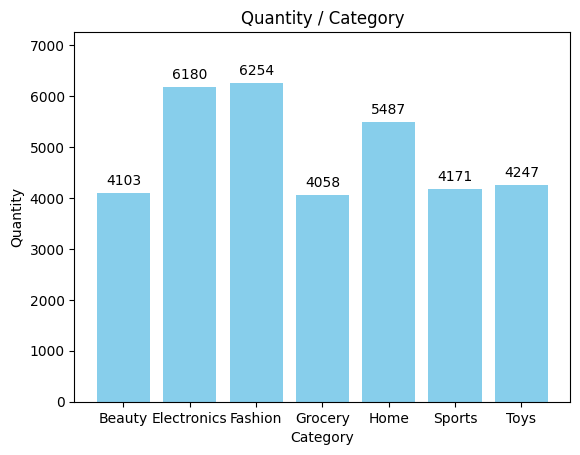

In [471]:
category_1 = df1.groupby('category')['quantity'].count().reset_index()

bars = plt.bar(category_1['category'], category_1['quantity'], color='skyblue')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 100,           # move label slightly above bar
        f'{int(bar.get_height())}',       # show count
        ha='center', va='bottom', fontsize=10
    )

plt.title('Quantity / Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.ylim(0, category_1['quantity'].max() + 1000)
# plt.xticks(rotation=45)
plt.show()


In [472]:
df1.head(10)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,order_month,order_year
0,O100000,C17270,P234890,Home,164.082353,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,0.00,60,Female,December,2023
1,O100001,C17603,P228204,Grocery,24.730000,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,2.62,37,Male,April,2025
2,O100002,C10860,P213892,Electronics,175.580000,0.05,1,Other,2024-10-08,4,Other,No,166.80,6.58,13.44,34,Male,October,2024
3,O100003,C15390,P208689,Electronics,63.670000,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,39,Female,September,2024
4,O100004,C15226,P228063,Home,16.330000,0.15,1,Cash,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male,December,2024
5,O100005,C15191,P214062,Beauty,53.910000,0.10,2,Other,2024-04-14,5,South,No,97.04,6.32,37.35,35,Female,April,2024
6,O100006,C13772,P201363,Electronics,266.500000,0.00,1,Wallet,2025-05-20,5,East,No,266.50,9.10,22.88,49,Male,May,2025
7,O100007,C13092,P216691,Beauty,9.980000,0.00,1,Credit Card,2023-09-14,4,West,No,9.98,4.51,0.00,66,Other,September,2023
8,O100008,C15734,P202751,Fashion,6.610000,0.05,1,Debit Card,2023-10-23,5,West,No,6.28,3.43,1.23,37,Female,October,2023
9,O100009,C16265,P207782,Grocery,10.910000,0.00,1,Card,2023-10-31,6,South,No,10.91,2.76,1.89,56,Male,October,2023


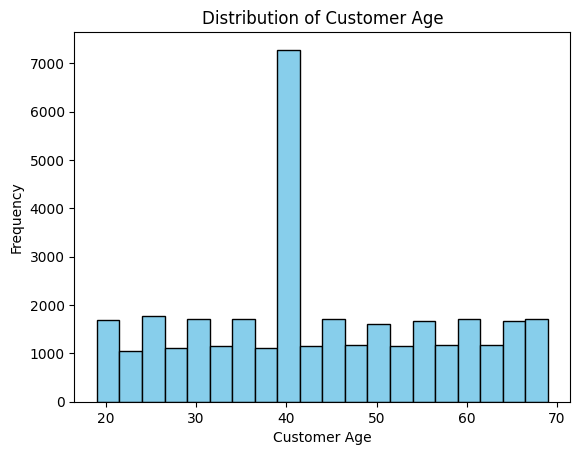

In [473]:
plt.hist(df1['customer_age'], bins=20, color='skyblue', edgecolor='black')  
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()


In [483]:
df1.to_excel('ecommerce_py6.xlsx')

In [475]:
df1.groupby('quantity')['order_id'].count()
# print(df1['quantity'].head())
# print(df1['quantity'].apply(type).value_counts())


quantity
1       24568
2        5020
3        2662
4        1370
5         657
1000      223
Name: order_id, dtype: int64

In [480]:
df1[df1['quantity']==1000].head(50)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,order_month,order_year
223,O100223,C12693,P229487,Grocery,1.020000,0.00,1000,Card,2024-05-25,5,East,No,1.02,2.20,2.12,20,Male,May,2024
439,O100439,C16373,P241704,Fashion,14.830000,0.30,1000,UPI,2025-09-06,4,South,No,10.38,4.19,0.56,62,Male,September,2025
467,O100467,C12205,P233786,Fashion,45.350000,0.30,1000,Wallet,2025-01-29,5,West,No,31.74,3.93,7.18,33,Female,January,2025
510,O100510,C10154,P212554,Electronics,311.420000,0.05,1000,Other,2024-05-11,5,West,No,295.85,9.00,26.50,49,Male,May,2024
1015,O101015,C16938,P244651,Fashion,167.200000,0.00,1000,Wallet,2025-04-05,7,South,No,836.00,8.78,283.82,45,Male,April,2025
1128,O101128,C12593,P205247,Grocery,0.008530,0.00,1000,Other,2025-09-02,4,North,No,8.53,3.41,2.73,45,Female,September,2025
1360,O101360,C16988,P211276,Toys,5.530000,0.10,1000,Credit Card,2023-11-22,4,South,No,4.98,1.82,0.17,39,Male,November,2023
1491,O101491,C15754,P224031,Grocery,2.950000,0.05,1000,UPI,2024-03-31,6,South,No,2.80,1.67,0.00,52,Female,March,2024
1555,O101555,C12935,P230016,Grocery,27.050000,0.05,1000,Wallet,2025-06-19,4,North,No,102.79,6.50,1.72,53,Male,June,2025
1566,O101566,C14146,P217858,Fashion,6.900000,0.00,1000,Other,2023-10-14,3,Other,No,20.70,3.94,3.30,37,Male,October,2023


In [481]:
# # i = 1000
# # a= 1.02
# # dis=0.00
# # price = 1.020
# # quantity = 1000
# # print(quantity)

# # quantity = int(a/(price*int((1-dis))))
# # print(quantity)
# # df1['price'] = df1['price'].apply(lambda x: abs(x) if x<=0 else x )

df1['quantity'] = df1.apply(
    lambda row: row['total_amount'] / (row['price'] * (1 - row['discount'])) 
                if row['quantity'] == 1000 else row['quantity'],
    axis=1
)


In [482]:
df1.head(50)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,order_month,order_year
0,O100000,C17270,P234890,Home,164.082353,0.15,1.0,Credit Card,2023-12-23,4,West,No,139.47,7.88,0.00,60,Female,December,2023
1,O100001,C17603,P228204,Grocery,24.730000,0.00,1.0,Credit Card,2025-04-03,6,South,No,24.73,4.60,2.62,37,Male,April,2025
2,O100002,C10860,P213892,Electronics,175.580000,0.05,1.0,Other,2024-10-08,4,Other,No,166.80,6.58,13.44,34,Male,October,2024
3,O100003,C15390,P208689,Electronics,63.670000,0.00,1.0,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,39,Female,September,2024
4,O100004,C15226,P228063,Home,16.330000,0.15,1.0,Cash,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male,December,2024
5,O100005,C15191,P214062,Beauty,53.910000,0.10,2.0,Other,2024-04-14,5,South,No,97.04,6.32,37.35,35,Female,April,2024
6,O100006,C13772,P201363,Electronics,266.500000,0.00,1.0,Wallet,2025-05-20,5,East,No,266.50,9.10,22.88,49,Male,May,2025
7,O100007,C13092,P216691,Beauty,9.980000,0.00,1.0,Credit Card,2023-09-14,4,West,No,9.98,4.51,0.00,66,Other,September,2023
8,O100008,C15734,P202751,Fashion,6.610000,0.05,1.0,Debit Card,2023-10-23,5,West,No,6.28,3.43,1.23,37,Female,October,2023
9,O100009,C16265,P207782,Grocery,10.910000,0.00,1.0,Card,2023-10-31,6,South,No,10.91,2.76,1.89,56,Male,October,2023
